#### Nama: Lukman Hakim
#### Kelas: D4RPL3

### Edge Detection

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##### Canny

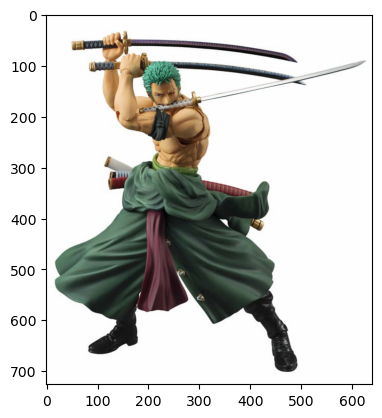

In [7]:
img = cv2.imread('zoro.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

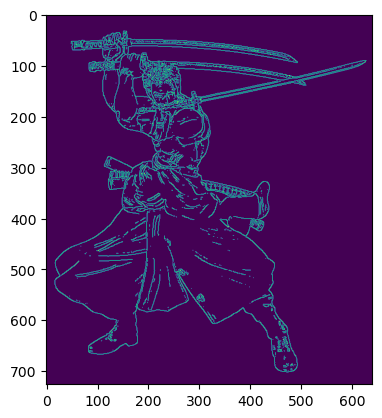

In [8]:
edgesCanny = cv2.Canny(image=img, threshold1=127, threshold2=127)
plt.imshow(edgesCanny)

##### Canny with Setting threshold

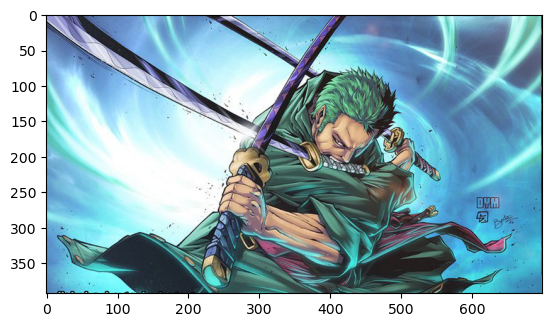

In [10]:
img = cv2.imread("zoro2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

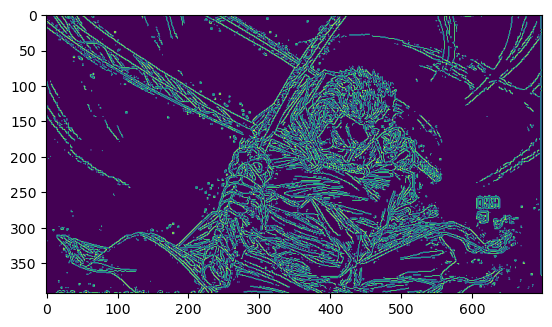

In [11]:
edgesCanny = cv2.Canny(image=img, threshold1=127, threshold2=127)
plt.imshow(edgesCanny)

##### Upper and Lower Median

In [12]:
# menghitung nilai median
med_val = np.median(img)
#  Lower  bound  dari  0  - 0,7  median
lower = int(max(0, 0.7* med_val))
# Upper  bound  antara  255  atau  0,3  dari  median
upper = int(min(255,1.3 * med_val))

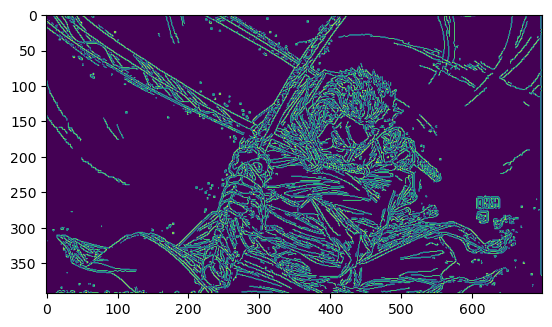

In [13]:
edgesCanny2 = cv2.Canny(image=img, threshold1=lower , threshold2=upper)
plt.imshow(edgesCanny2)

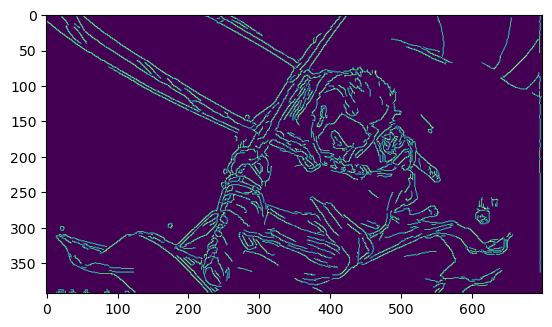

In [14]:
# tambahkan filter blur atau laininya pada gambar
blurred_img = cv2.blur(img,ksize=(5,5))
edgesCanny3 = cv2.Canny(image=blurred_img, threshold1=lower , threshold2=upper)
plt.imshow(edgesCanny3)

##### Metode edge detection lainnya (Laplacian)

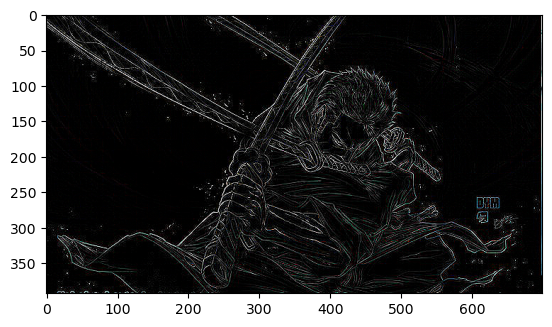

In [16]:
laplacian = cv2.Laplacian(img,cv2.CV_8U)
plt.imshow(laplacian)

##### Sobel

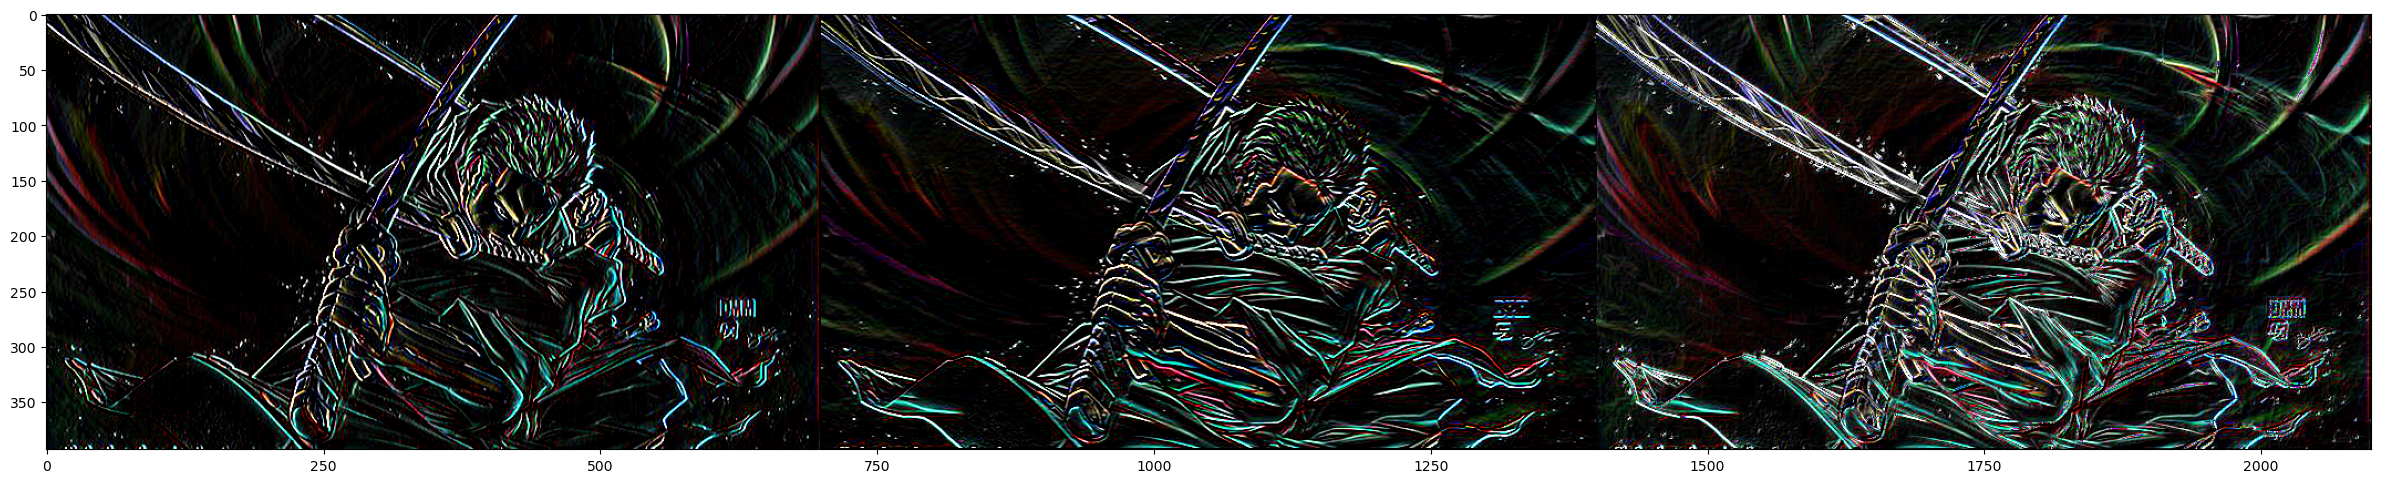

In [17]:
sobelx = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=3) # x
sobely = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=3) # y
hasil = sobelx+sobely
sobel = np.hstack((sobelx, sobely, hasil))
plt.figure(figsize=(30, 10))
plt.imshow(sobel)

##### Prewitt

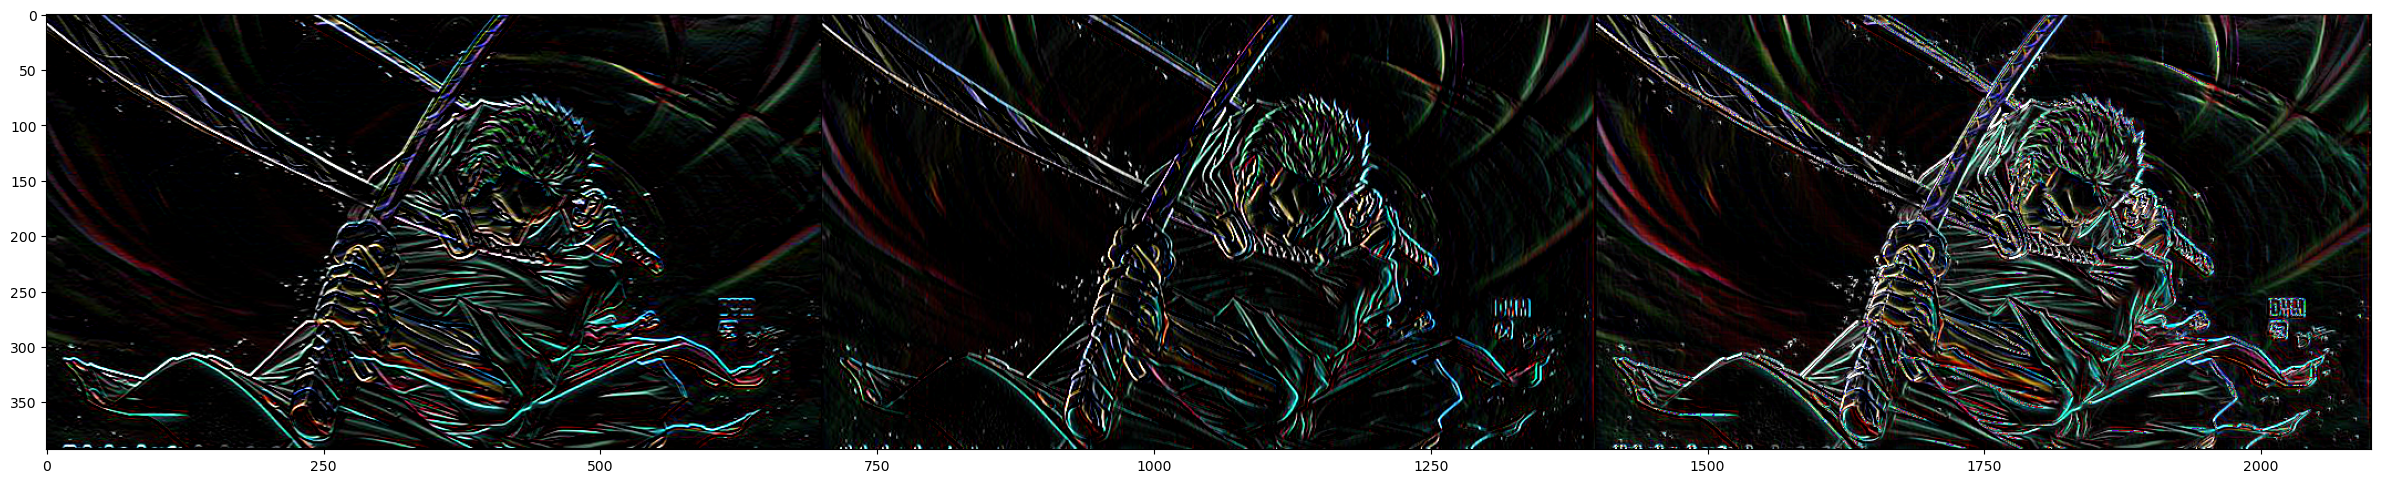

In [19]:
#prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewittx = cv2.filter2D(img, -1, kernelx)
prewitty = cv2.filter2D(img, -1, kernely)
hasil = prewittx+prewitty
prewitt=np.hstack((prewittx, prewitty, hasil))
plt.figure(figsize=(30, 10))
plt.imshow(prewitt)

#### Corner Detection
##### Persiapan Data

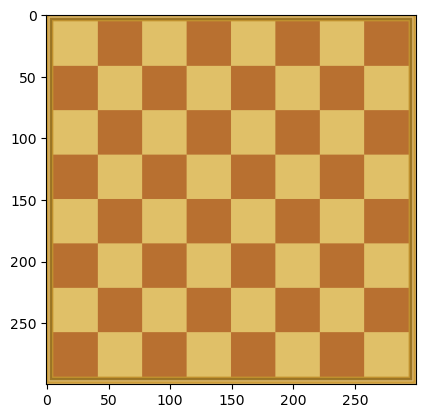

In [20]:
# data  1  papan  catur
papanCatur = cv2.imread('papancatur.png')
papanCatur = cv2.cvtColor(papanCatur,cv2.COLOR_BGR2RGB)
plt.imshow(papanCatur)

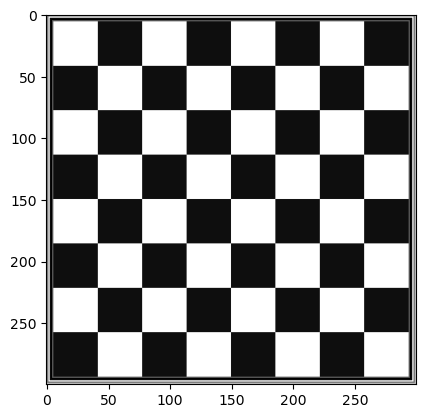

In [21]:
# convert  gray  level
grayPapanCatur = cv2.cvtColor(papanCatur,cv2.COLOR_BGR2GRAY)
plt.imshow(grayPapanCatur,cmap='gray')

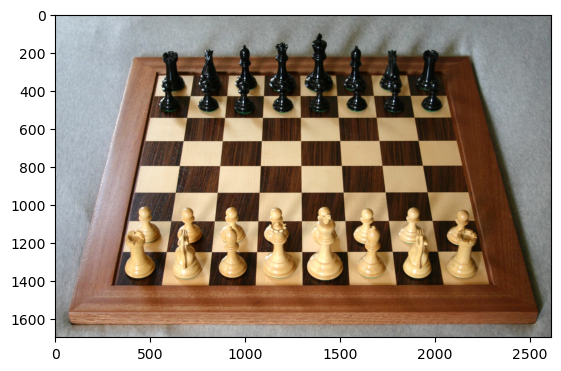

In [22]:
# data  ke  dua  real  papan  catur
realCatur = cv2.imread('realCatur.jpg')
realCatur = cv2.cvtColor(realCatur,cv2.COLOR_BGR2RGB) 
plt.imshow(realCatur)

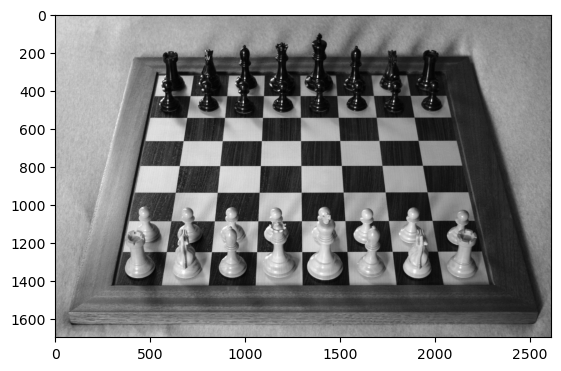

In [23]:
# convert gray  level data  ke 2
grayRealCatur = cv2.cvtColor(realCatur,cv2.COLOR_BGR2GRAY)
plt.imshow(grayRealCatur,cmap='gray')

##### Harris Corner Detection

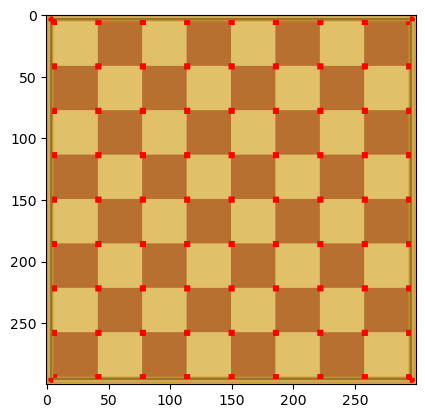

In [24]:
# Convert  Gray  Scale  Image  to  Float  Values
gray = np.float32(grayPapanCatur)

# Corner  Harris  Detection
hcd = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

# display  hasil  corner  dengan  melakukan  dilasi
hcd = cv2.dilate(hcd,None)

# memberikan  threshold  untuk  meletakan  di  gambar
papanCatur[hcd>0.01*hcd.max()]=[255,0,0]

plt.imshow(papanCatur)

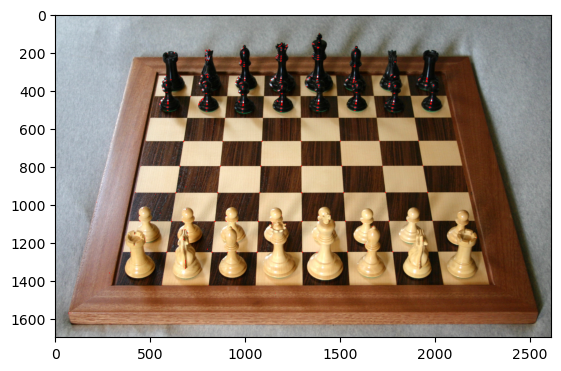

In [25]:
# Convert  Gray  Scale  Image  to  Float  Values
gray = np.float32(grayRealCatur)

# Corner  Harris  Detection
hcd = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

# display  hasil  corner  dengan  melakukan  dilasi
hcd = cv2.dilate(hcd,None)

# memberikan  threshold  untuk  meletakan  di  gambar
realCatur[hcd>0.01*hcd.max()]=[255,0,0]

plt.imshow(realCatur)

##### Shi-Tomasi Corner Detector

In [26]:
# panggil kembali data papan catur dan convert ke gray
papanCatur = cv2.imread('papancatur.png')
papanCatur = cv2.cvtColor(papanCatur,cv2.COLOR_BGR2RGB)
grayPapanCatur = cv2.cvtColor(papanCatur,cv2.COLOR_BGR2GRAY)

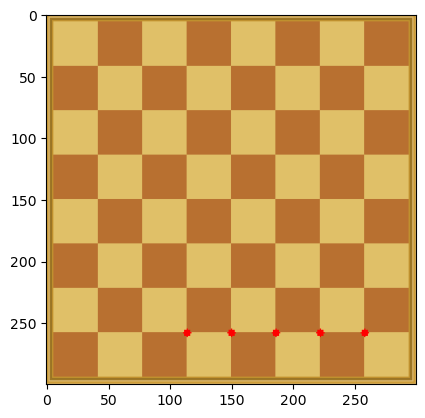

In [28]:
corners = cv2.goodFeaturesToTrack(grayPapanCatur,5,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(papanCatur,(x,y),3,255,-1)

plt.imshow(papanCatur)

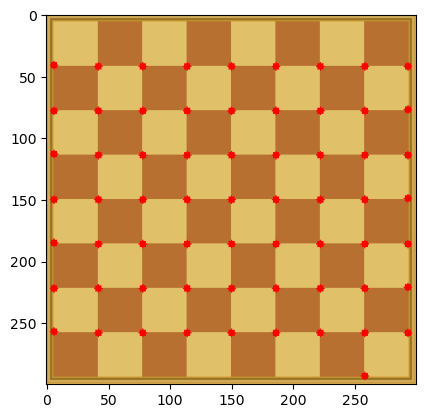

In [31]:
# perubahan parameter
corners = cv2.goodFeaturesToTrack(grayPapanCatur,64,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(papanCatur,(x,y),3,255,-1)

plt.imshow(papanCatur)

In [32]:
# data  real
realCatur = cv2.imread('realcatur.jpg')
realCatur = cv2.cvtColor(realCatur, cv2.COLOR_BGR2RGB) 
grayRealCatur = cv2.cvtColor(realCatur, cv2.COLOR_RGB2GRAY)

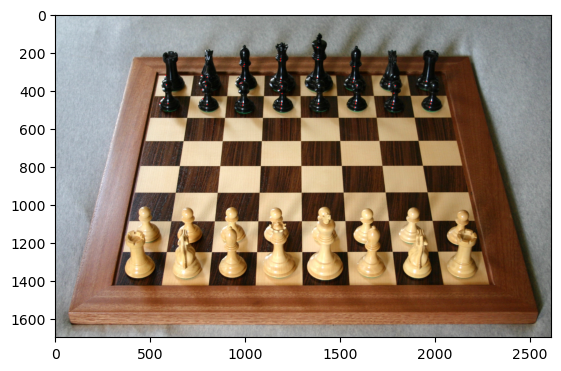

In [34]:
# perubahan parameter
corners = cv2.goodFeaturesToTrack(grayRealCatur,50,0.01,10) 
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(realCatur,(x,y),3,255,-1)

plt.imshow(realCatur)

#### Contour Detection
##### Find Contour

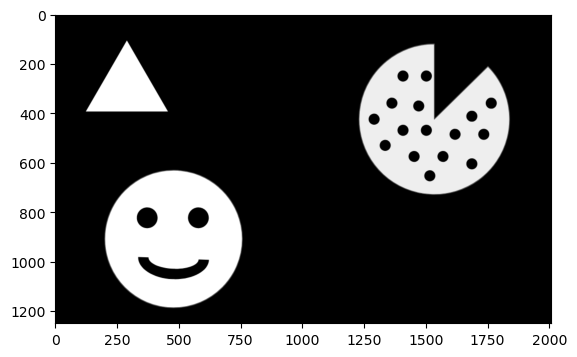

In [35]:
imgContour = cv2.imread('sampleContour.png',0)
plt.imshow(imgContour, cmap='gray')

In [36]:
contours, hierarchy = cv2.findContours(imgContour, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
print(f'tipe dari contour : {type(contours)}, size contour : {len(contours)}')
print(f'tipe dari hierarchy : {type(hierarchy)}, size contour : {hierarchy.shape}')

tipe dari contour : <class 'tuple'>, size contour : 22
tipe dari hierarchy : <class 'numpy.ndarray'>, size contour : (1, 22, 4)


In [37]:
hierarchy

array([[[ 4, -1,  1, -1],
        [ 2, -1, -1,  0],
        [ 3,  1, -1,  0],
        [-1,  2, -1,  0],
        [21,  0,  5, -1],
        [ 6, -1, -1,  4],
        [ 7,  5, -1,  4],
        [ 8,  6, -1,  4],
        [ 9,  7, -1,  4],
        [10,  8, -1,  4],
        [11,  9, -1,  4],
        [12, 10, -1,  4],
        [13, 11, -1,  4],
        [14, 12, -1,  4],
        [15, 13, -1,  4],
        [16, 14, -1,  4],
        [17, 15, -1,  4],
        [18, 16, -1,  4],
        [19, 17, -1,  4],
        [20, 18, -1,  4],
        [-1, 19, -1,  4],
        [-1,  4, -1, -1]]], dtype=int32)

##### Eksternal Contour

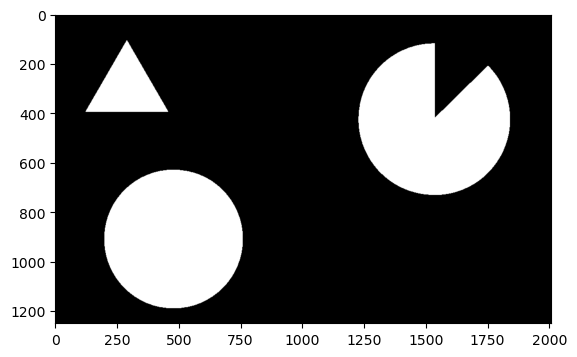

In [38]:
# Set  up  empty  array
external_contours = np.zeros(imgContour.shape)

# looping  seluruh  contour
for i in range(len(contours)):
    # kolom  terakhir  berisi  -1  -->  eksternal  contour
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(external_contours, contours, i, 255, -1)
plt.imshow(external_contours,cmap='gray')

##### Internal Contour

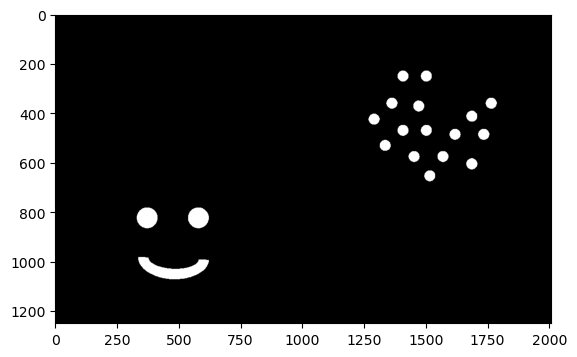

In [39]:
# Create  empty  array
image_internal = np.zeros(imgContour.shape)

# looping  seluruh  contour
for i in range(len(contours)):
    # kolom terakhir tidak berisi -1 --> internal contour
    if hierarchy[0][i][3] != -1:
        cv2.drawContours(image_internal, contours, i, 255, -1)
plt.imshow(image_internal,cmap='gray')